## Getting the data ready

Three main things that we focus on:

1. Split the data into the variables ( mostly 'X' and 'y')
2. Filling (aka imputing) or disregarding missing values
3. Converting the non-numeric values to numeric values ( objects to int [aka feature encoding])


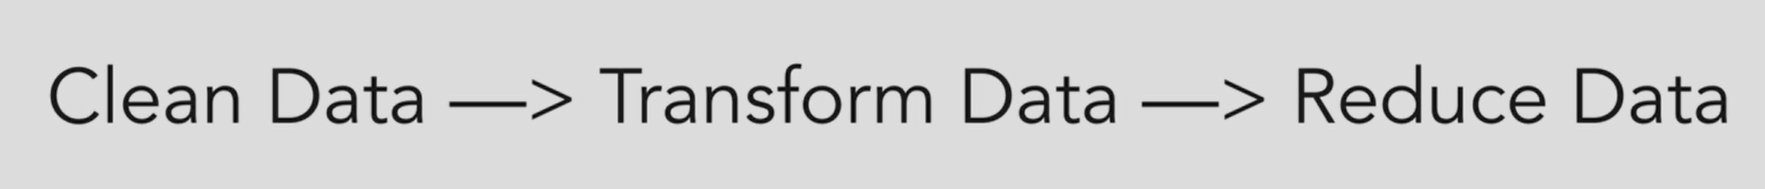

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
X = df.drop('target' , axis=1)
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [4]:
y = df['target']
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [5]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2)


In [6]:
X_train.shape  , X_test.shape  , y_train.shape , y_test.shape 

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape

(303, 13)

In [8]:
# All numerical values in our dataset
df2 = pd.read_csv('car-sales-extended.csv')
df2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
df2['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [10]:
df2.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
df2.shape

(1000, 5)

In [12]:
X = df2.drop('Price' , axis = 1)
y = df2['Price']

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test , y_test)

ValueError: could not convert string to float: 'Toyota'

In [15]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [16]:
# Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_values =  ['Make' ,'Colour' , 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                one_hot , 
                                categorical_values)] ,
                                 remainder= "passthrough")


transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [18]:
# Another way to do this!
dummies = pd.get_dummies(df2[['Make' ,'Colour' ,'Doors']])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [19]:
#Let's refit the model.
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(transformed_X ,
                                                       y, 
                                                       test_size= 0.2) 


model.fit(X_train , y_train)

RandomForestRegressor()

In [20]:
model.score(X_test , y_test)

0.3235867221569877

### Let's Handle How to deal with the missing values:

1. You can fill them with some values (aka imputations)
2. Remove the samples with missing data altogether.


In [35]:
# Import the car sales missing data

missing_data = pd.read_csv('car-sales-extended-missing-data.csv')

missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [36]:
missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
X = missing_data.drop('Price' , axis = 1)
y = missing_data['Price']

In [38]:
#Let's Again Convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_values =  ['Make' ,'Colour' , 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                one_hot , 
                                categorical_values)] ,
                                 remainder= "passthrough")


transformed_X = transformer.fit_transform(X)
transformed_X

# It used give error of having the nan values in the dataset... This was in previous version.
# But in this we are not getting error.. even though we will deal with the missing values 

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Fill missing data using PANDAS

In [39]:
# Filling the make column
missing_data['Make'].fillna('missing' , inplace = True)

# Filling the colour column
missing_data['Colour'].fillna('missing' , inplace = True)

# Filling the 'Odometer' column
missing_data['Odometer (KM)'].fillna(missing_data['Odometer (KM)'].mean() , inplace = True)

# Filling the doors column
missing_data['Doors'].fillna(4 , inplace = True)

In [40]:
missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Removing the rows with missing price 
missing_data.dropna(inplace = True)

In [42]:
# Check one last time
missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
# LEt's find what amount of data we lost
len(missing_data)

950

In [44]:
missing_data.shape

(950, 5)

In [45]:
X = missing_data.drop("Price" , axis = True)
y = missing_data["Price"]

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_values =  ['Make' ,'Colour' , 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                one_hot , 
                                categorical_values)] ,
                                 remainder= "passthrough")


transformed_X = transformer.fit_transform(missing_data)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [ ]:
## Another option to fill missing values using Scikitlearn